## Description: Analyze the dataset to identify relationships and potential issues, then create new features to improve model performance.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Fish.csv")  # Replace with your file path

# Check for missing values
print(df.isnull().sum())

# Encode categorical feature: Species
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Split features and target
X = df.drop('Weight', axis=1)  # Weight is target
y = df['Weight']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Optional: Scaling (for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


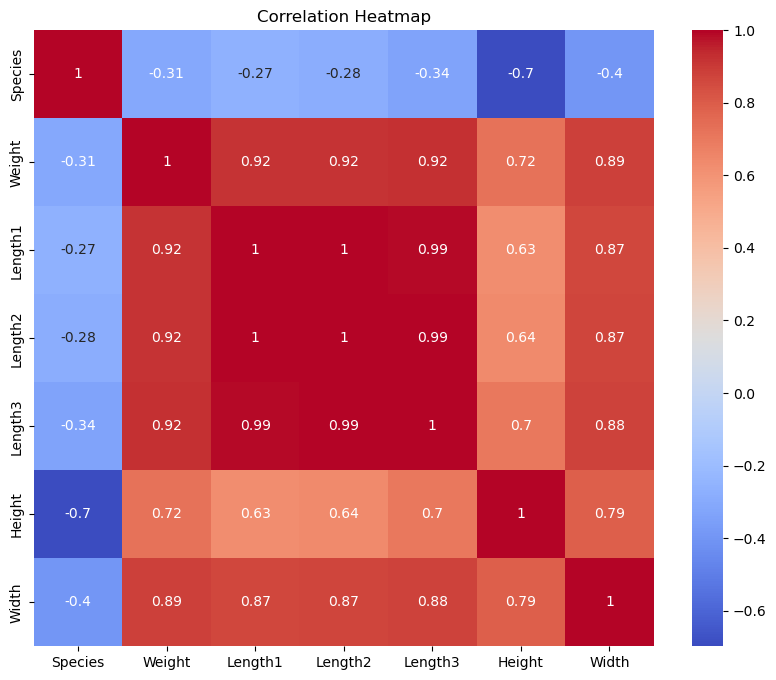

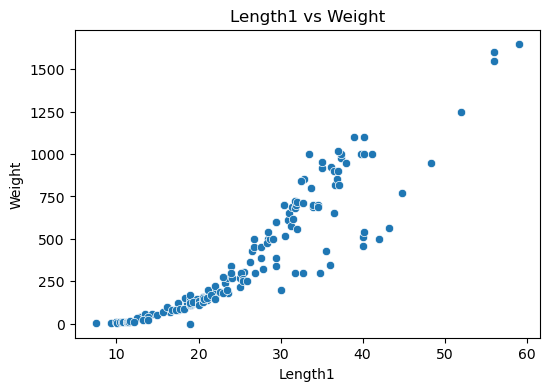

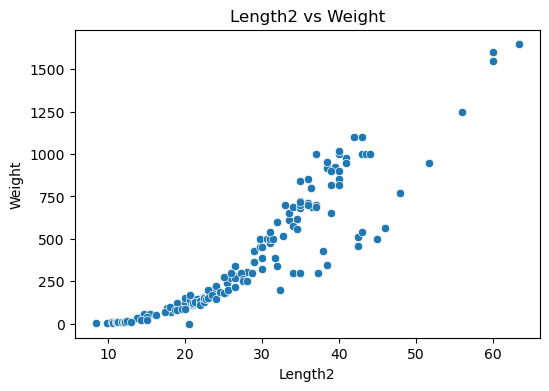

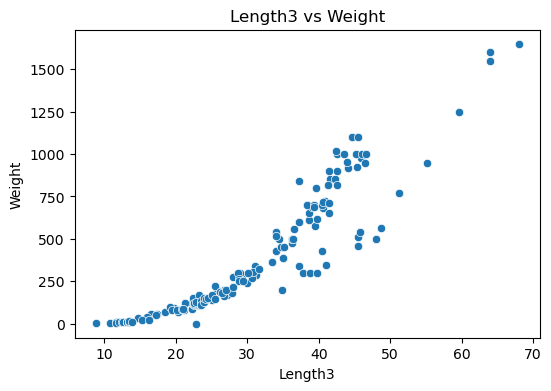

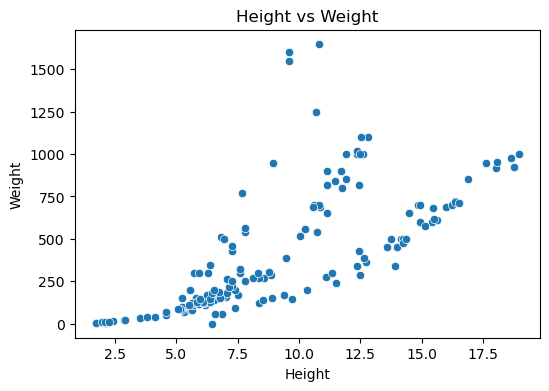

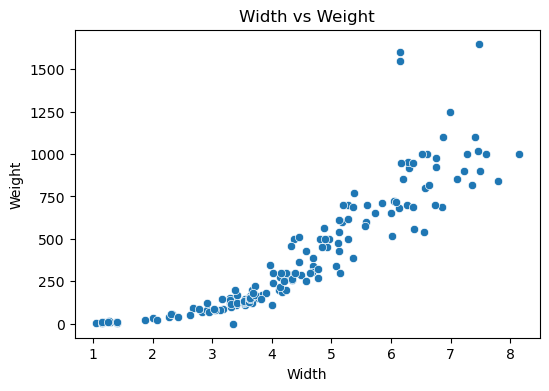

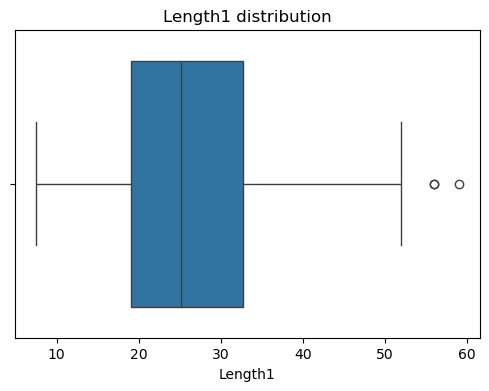

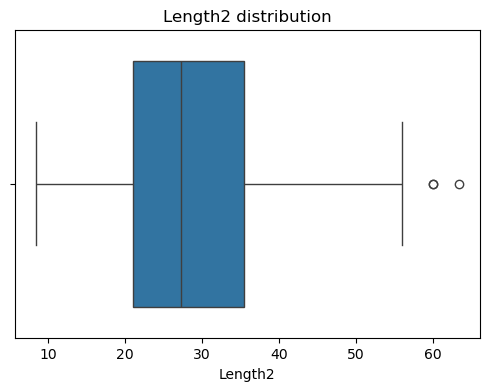

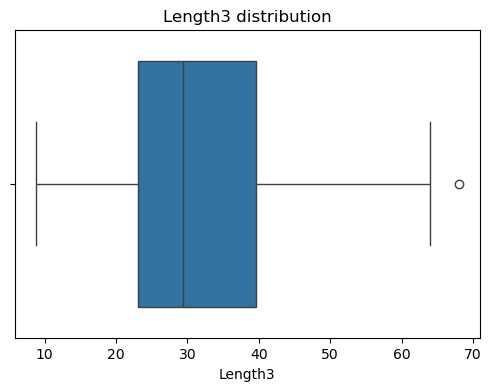

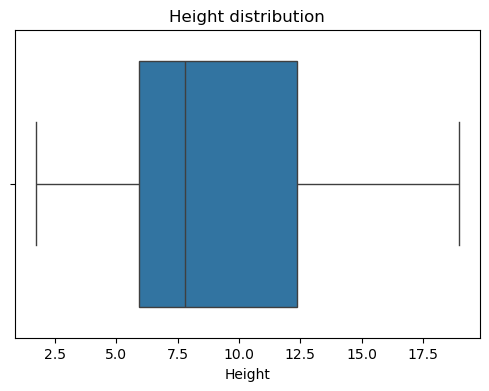

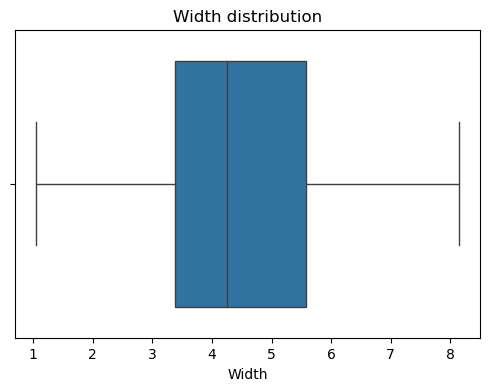

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots of features vs Weight
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Weight'])
    plt.title(f'{feature} vs Weight')
    plt.show()

# Boxplots for outlier detection
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} distribution')
    plt.show()

# Feature engineering: interaction term
X_train['Length_Width'] = X_train['Length3'] * X_train['Width']
X_test['Length_Width'] = X_test['Length3'] * X_test['Width']

# Update scaled versions for linear models
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - RMSE: {rmse:.2f}, R2: {r2:.2f}')

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# 4. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")


Linear Regression - RMSE: 62.45, R2: 0.97
Ridge Regression - RMSE: 63.46, R2: 0.97
Lasso Regression - RMSE: 63.62, R2: 0.97
Polynomial Regression - RMSE: 62.85, R2: 0.97


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.608e+04, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


## Conclusion:
All four regression models provide accurate predictions for fish weight, with Linear Regression being a simple yet effective baseline, and Polynomial Regression capturing potential non-linear relationships without significant improvement over the linear model.